In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

In [2]:
df = pd.read_csv('Project1_data.csv')

In [3]:
df = df[df.Year != 2013]

def time_convert(x):
    times = x.split(':')
    return (3600*int(times[0])+60*int(times[1]))+int(times[2])

t = df.Time.apply(time_convert)
df.Time = t

def pace_convert(x):
    times = x.split(':')
    return (60*int(times[0])+int(times[1]))

p = df.Pace.apply(pace_convert)
df.Pace = p

def gender_convert(x):
    if (x == 'M'):
        return 0
    else:
        return 1
g = df.Sex.apply(gender_convert)
df.Sex = g
def check_professionals(x):
    if (x >= 10800):
       value = 1 
    else:
        value = 0
    return value
df['Pro_or_Amature'] = df.Time.apply(check_professionals)

In [4]:
df.columns=['Id','Name','Age','Sex','Rank','Time','Pace','Year','Pro_or_Amature']

In [5]:
def check_2011(x):
    if (x == 2011):
        value = 1 
    else:
        value = 0
    return value
df['Participation_in_2011'] = df.Year.apply(check_2011)
def check_2012(x):
    if (x == 2012):
        value = 1 
    else:
        value = 0
    return value
df['Participation_in_2012'] = df.Year.apply(check_2012)

In [6]:
df['No_of_participations'] = df.groupby('Name')['Id'].transform('count')
df.drop_duplicates()

,Id,Name,Age,Sex,Rank,Time,Pace,Year,Pro_or_Amature,Participation_in_2011,Participation_in_2012,No_of_participations
0,1,carlos enrique portugal quintero,30,0,1263,15300,584,2016,1,0,0,1
1,2,leonel furlan,60,0,2289,18342,701,2016,1,0,0,1
2,3,meredith gray,30,1,2276,18274,698,2016,1,0,0,1
3,4,jason ainspan,35,0,670,13977,533,2015,1,0,0,2
4,4,jason ainspan,35,0,2390,18810,718,2016,1,0,0,2
5,5,marcela todd,40,1,2608,19714,753,2016,1,0,0,9
6,5,marcela todd,42,1,3086,20594,786,2014,1,0,0,9
7,5,marcela todd,38,1,2455,19744,753,2010,1,0,0,9
8,5,marcela todd,36,1,2343,19729,753,2008,1,0,0,9
9,5,marcela todd,37,1,2415,19647,749,2009,1,0,0,9


In [7]:
data_raw = df
f = {'Age':['mean'],'Pace':['mean'],'Rank': ['mean'],'No_of_participations':['mean'],'Participation_in_2011':['sum'],'Participation_in_2012':['sum']}
data_editted = data_raw.groupby(['Id','Name','Sex'],as_index=False).agg(f)
data_editted.columns = data_editted.columns.droplevel(1)

In [8]:
def check_2012_2(x):
    if (x >= 1):
        value = 1 
    else:
        value = 0
    return value    
K = data_editted.Participation_in_2012.apply(check_2012_2)
LL = data_editted.Participation_in_2011.apply(check_2012_2)
data_editted.Participation_in_2012 = K
data_editted.Participation_in_2011 = LL
#data_editted.to_csv('Logistic1.csv')


In [9]:
#Creating a output column
Y = data_editted.Participation_in_2012.values

In [10]:
X= pd.concat([data_editted['Sex'],data_editted['No_of_participations'],data_editted['Participation_in_2011'],data_editted['Age'],data_editted['Rank'],data_editted['Pace']],axis=1)
X1 = X.values
X = np.insert(X1,0,1, axis=1)# adding a column of 1's for the bias term

In [11]:
#Splitting the data in test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X ,Y , test_size = 0.2, random_state = 0)

/Users/anilpatil/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
def normalize(x):
    norm_vec = (X_train[:,x]-X_train[:,x].min())/(X_train[:,x].max()- X_train[:,x].min())
    X_train[:,x] = norm_vec
    return norm_vec
    

In [13]:
normalize(4)
normalize(5)
normalize(6)

array([ 0.37558685,  0.16314554,  0.44014085, ...,  0.45657277,
        0.40140845,  0.18309859])

In [14]:
#Computing results with Scikit Learn
from sklearn.linear_model import LogisticRegression
Classifier  =  LogisticRegression(random_state= 0)
Classifier.fit(X_train,Y_train)
Y_predSklearn=Classifier.predict(X_test)


In [15]:
def generate_confusion_matrix(y2,y1):
    from sklearn.metrics import confusion_matrix
    cm_sklearn = confusion_matrix(y2,y1)
    print cm_sklearn

In [16]:
#initial settings
initial_theta = np.random.random((X_train.shape[1]))/100
alpha = 0.001
iters = 7000
example_size = len(Y_train)
l1 = 5

In [17]:
def Gen_classification_report(y1,y2):
    from sklearn.metrics import classification_report
    target = ['Attending(1)','Not Attending(0)']
    print classification_report(y1,y2,target_names=target)
    

In [18]:
def calculate_accuracy(y1,y2):
    y2 = np.ravel(y2)
    acc = float(100*(y1==y2).sum())/ float(y1.shape[0])
    return acc

In [19]:
def ROC_curve_plot(y1,y2):
    y2 = np.ravel(y2)
    from sklearn.metrics import roc_curve,auc
    fp,tp,thersh = roc_curve(y1,y2)
    curve_area=auc(fp,tp)
    plt.title('ROC Curve')
    plt.plot(fp,tp,'b', label = 'Area Under Curve = %0.2f'% curve_area)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [20]:
#Sigmoid Activation function
def sigmoid_activation(x):
# compute and return the sigmoid activation value for a
# given input value
    return 1.0 / (1 + np.exp(-x))

In [21]:
# The cross entropy error function
def cost_function_vectorized(example_size, X, Y, vector_theta):
    mult = -1/example_size
    h = sigmoid_activation(vector_theta.dot(X.T))
    result = (Y)*(np.log(h)) + (1 - Y)*(np.log ( 1 - h ))#+ l1*np.abs(vector_theta).mean()
    J = mult * result 
    return J

In [22]:
#functin computing gradient descent:
def cost_derivative_vectorized(alpha,theta, X, Y, example_size):
    J_history = np.zeros(shape = (iters,1))
    for i in range(iters):
        c = (sigmoid_activation(theta.dot(X.T) - Y))
        c = c.dot(X)
        theta = theta - (alpha * c / example_size) #+ l1*np.sign(w)
        J_history = cost_function_vectorized(example_size, X, Y,theta)
        
    return J_history, theta

In [23]:
def make_predictions(x,theta):
    m = x.shape[0]
    Y_probablities=sigmoid_activation(x.dot(theta))
    Y_predictions = np.zeros(shape = (m,1))
    for k in range(1,m):
        if (Y_probablities[k] >= 0.001):
            Y_predictions[k] = 1
        else:
            Y_predictions[k] = 0
    return Y_predictions

In [24]:
J,theta = cost_derivative_vectorized(alpha, initial_theta, X_train, Y_train, example_size)

In [25]:
#Approach 2
N = 100
w = initial_theta
def cross_entropy(target, Y):
    E = 0
    for i in xrange(N):
        if target[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [26]:
z_approach2 = X_train.dot(initial_theta)
K_approach2= sigmoid_activation(z_approach2)


In [27]:
learning_rate = 0.001
results  = np.zeros(shape = (iters,1))
for i in xrange(50):
    if i % 10 == 0:
        results[i,0]=  cross_entropy(Y_train, K_approach2)
       
    w += learning_rate * ( X_train.T.dot(Y_train - K_approach2) - 0.1*w )



In [28]:
Y_predicted_approach1 = make_predictions(X_test,theta)
Y_predicted_approach2 = make_predictions(X_test,w)

In [29]:
print 'Confusion matrix for strategy 1:\n', generate_confusion_matrix(Y_test,Y_predicted_approach1)
print 'Confusion matrix for strategy 2:\n', generate_confusion_matrix(Y_test,Y_predicted_approach2)
print 'Confusion matrix for Sklearn:\n', generate_confusion_matrix(Y_test,Y_predSklearn)

Confusion matrix for strategy 1:
[[4724    0]
 [ 775    0]]
None
Confusion matrix for strategy 2:
[[4724    0]
 [ 775    0]]
None
Confusion matrix for Sklearn:
[[1755 2969]
 [ 180  595]]
None


In [30]:
print 'Classification Report strategy 1:\n',Gen_classification_report(Y_test,Y_predicted_approach1)
print '\nClassification Report Sklearn:\n',Gen_classification_report(Y_test,Y_predSklearn)

Classification Report strategy 1:
                  precision    recall  f1-score   support

    Attending(1)       0.86      1.00      0.92      4724
Not Attending(0)       0.00      0.00      0.00       775

     avg / total       0.74      0.86      0.79      5499

None

Classification Report Sklearn:
                  precision    recall  f1-score   support

    Attending(1)       0.91      0.37      0.53      4724
Not Attending(0)       0.17      0.77      0.27       775

     avg / total       0.80      0.43      0.49      5499

None


/Users/anilpatil/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
print '\nAccuracy for strategy 1 is:', calculate_accuracy(Y_test,Y_predicted_approach1)
print '\nAccuracy for Sklearn is:', calculate_accuracy(Y_test,Y_predSklearn)


Accuracy for strategy 1 is: 85.9065284597

Accuracy for Sklearn is: 42.735042735


 ROC curve for gradient descent:


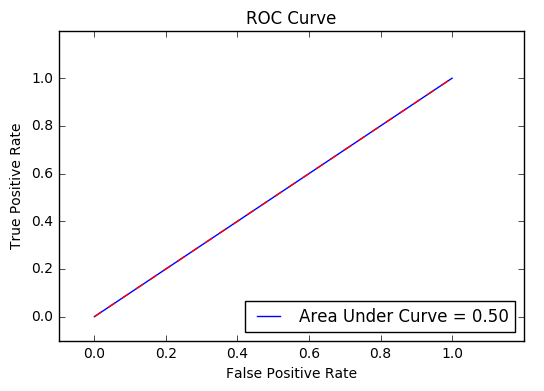

None


In [32]:
print ' ROC curve for gradient descent:\n', ROC_curve_plot(Y_test,Y_predicted_approach1)

 ROC curve for Sklearn:


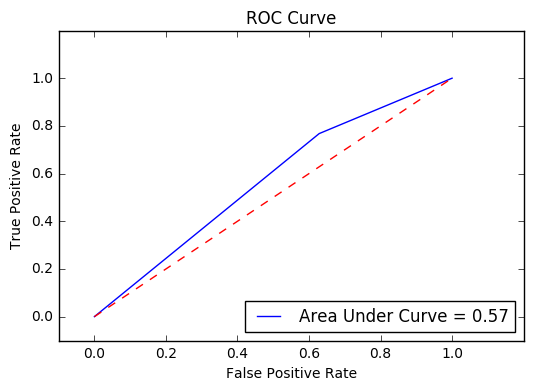

None


In [33]:
print ' ROC curve for Sklearn:\n', ROC_curve_plot(Y_test,Y_predSklearn)

In [34]:
df_input = pd.read_csv('Results.csv',index_col=0)

In [35]:
df_submit = pd.read_csv('Project1_data.csv')

In [36]:
p1 = df_submit.Pace.apply(pace_convert)
df_submit.Pace = p1

In [37]:
g1 = df_submit.Sex.apply(gender_convert)
df_submit.Sex = g1

In [38]:
df_submit['Participation_in_2011'] = df_submit.Year.apply(check_2011)
df_submit['Participation_in_2012'] = df_submit.Year.apply(check_2012)

In [39]:
df_submit['No_of_participations'] = df_submit.groupby('Name')['Id'].transform('count')


In [40]:

f = {'Age Category':['mean'],'Pace':['mean'],'Rank': ['mean'],'No_of_participations':['mean'],'Participation_in_2011':['sum'],'Participation_in_2012':['sum']}
df_submit = df_submit.groupby(['Id','Name','Sex'],as_index=False).agg(f)
df_submit.columns = df_submit.columns.droplevel(1)

In [41]:
def check_2012_2(x):
    if (x >= 1):
        value = 1 
    else:
        value = 0
    return value    
K = df_submit.Participation_in_2012.apply(check_2012_2)
LL = df_submit.Participation_in_2011.apply(check_2012_2)
df_submit.Participation_in_2012 = K
df_submit.Participation_in_2011 = LL

In [42]:
df_submit

,Id,Name,Sex,No_of_participations,Age Category,Rank,Pace,Participation_in_2012,Participation_in_2011
0,1,carlos enrique portugal quintero,0,1,30.000000,1263.000000,584.000000,0,0
1,2,leonel furlan,0,1,60.000000,2289.000000,701.000000,0,0
2,3,meredith gray,1,1,30.000000,2276.000000,698.000000,0,0
3,4,jason ainspan,0,2,35.000000,1530.000000,625.500000,0,0
4,5,marcela todd,1,9,37.888889,2599.000000,755.444444,1,1
5,6,luigi carrasquilla,0,1,45.000000,1845.000000,647.000000,0,0
6,7,inaki mendoza,0,2,41.000000,602.500000,527.500000,0,0
7,8,veronica lobos ortiz,1,1,30.000000,912.000000,548.000000,0,0
8,9,daniel loebl,0,4,50.500000,1890.250000,653.000000,1,0
9,10,jeisson valderrama aguirre,0,1,25.000000,1934.000000,656.000000,0,0


In [43]:
Y_final = df_submit.Participation_in_2012.values
X_final= pd.concat([df_submit['Sex'],df_submit['No_of_participations'],df_submit['Participation_in_2011'],df_submit['Age Category'],df_submit['Rank'],df_submit['Pace']],axis=1)
X1_final = X_final.values
X_final = np.insert(X1_final,0,1, axis=1)# adding a column of 1's for the bias term

In [44]:
Y_final_predict = make_predictions(X_final,theta)

In [45]:
df_inter = pd.DataFrame(Y_final_predict,columns=['Y1_Logistic'])

In [46]:
df_final = pd.concat([df_input,df_inter], axis = 1)

In [47]:
df_final.columns=['Id','Name','Y2_REGRESSION','Y1_LOGISTIC']
df_final_sub = df_final[['Id','Name','Y1_LOGISTIC','Y2_REGRESSION']]
df_final_sub.fillna(0)


,Id,Name,Y1_LOGISTIC,Y2_REGRESSION
0,1,carlos enrique portugal quintero,0.0,0:10:21.600866
1,2,leonel furlan,0.0,0:18:46.653107
2,3,meredith gray,0.0,0:18:39.024931
3,4,jason ainspan,0.0,0:12:32.914447
4,5,marcela todd,0.0,0:21:17.957388
5,6,luigi carrasquilla,0.0,0:15:08.007573
6,7,inaki mendoza,0.0,0:04:57.743148
7,8,veronica lobos ortiz,0.0,0:07:29.269565
8,9,daniel loebl,0.0,0:15:30.457849
9,10,jeisson valderrama aguirre,0.0,0:15:50.866855


In [49]:
df_final_sub.to_csv('Predctions.csv')